In [1]:

import re
import numpy as np
import pandas as pd
from pprint import pprint
import pickle
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import nltk
from nltk.corpus import wordnet as wn
#nltk.download('stopwords')
#nltk.download('wordnet')
# spacy for lemmatization
import spacy
from spacy.lang.en import English
parser = English()

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import pickle

with open("../data/tech_review_word_corpus.pkl","rb") as f:
    tech_review_corpus = pickle.load(f)
    
display(pd.DataFrame(tech_review_corpus).head(10))

reviews = pd.DataFrame(tech_review_corpus).review.tolist()

#reviews = list(map(str.split, reviews))

,index,review
0,299,great company people care make difference mana...
1,1145,powerhouse epc went heavy worksharing send muc...
2,1375,much could add enjoyed working people working ...
3,1874,place pretty boring time interesting facility ...
4,2136,everyone hurry get thing done hurry part make ...
5,2209,hire term would rate hired nice intelligent pe...
6,2685,hated working company pay great management utt...
7,3054,interesting day work enjoyable environment use...
8,3082,challenging place work manager five office 200...
9,3134,total thirty seven 37 year successful engineer...


In [2]:
reviews

['great company people care make difference management care employee well providing continued learning opportunity',
 'powerhouse epc went heavy worksharing send much work overseas possible keep core person heavy loaded company management chase project hire thousand oil booming turn lay thousand going sharpest spike hiring laying employee clearly greatest asset',
 'much could add enjoyed working people working loved hour great flexibility needed',
 'place pretty boring time interesting facility uranium enrichment almost half century',
 'everyone hurry get thing done hurry part make sure get need get done typically level removed customer actually work',
 'hire term would rate hired nice intelligent people reasonably pleasant place spend 40 hr per work infrastructure adequately maintained except maybe escalator could also rate bos time rated benefit better average project reasonably well managed returned rate pension performance appraisal process lost objectivity could longer holiday tim

In [3]:
#NLTK Stop words

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#extend stop word based on top 50 words
stop_words.extend(["new","lot","get","many","also","day","part","one","things","always","years","really"])

In [4]:
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [5]:
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

In [6]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    #tokens = [token for token in tokens if len(token) > 4]
    #tokens = [token for token in tokens if token not in stop_words]
    #tokens = [get_lemma(token) for token in tokens]
    return tokens

work 41842
good 30118
company 17611
management 13097
great 11881
working 10492
place 10491
job 10330
lot 8210
employee 8075
environment 7772
project 7570
people 7258
time 7201
culture 7159
life 7123
learn 6398
opportunity 6381
technology 6050
balance 5563


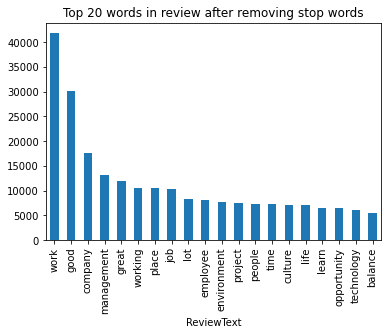

In [154]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(reviews, 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words in review after removing stop words')


place work 5360
work life 5140
life balance 4804
good work 3596
work culture 3275
good place 2713
good company 2620
company work 2321
work environment 2242
great place 2109
management good 1417
hardest job 1375
work good 1283
job security 1279
culture good 1269
learned lot 1212
good management 1091
great work 1068
great company 1004
enjoyable job 1001


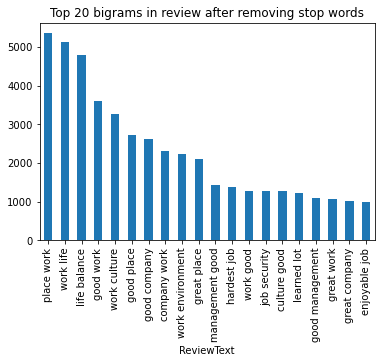

In [155]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(reviews, 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams in review after removing stop words')


work life balance 4629
good place work 1634
great place work 1470
good work life 1291
good company work 953
life balance good 860
good work culture 796
work culture good 741
nice place work 577
great company work 478
place work good 432
good work environment 343
work environment good 327
great work life 308
fun place work 306
good place learn 296
good working environment 276
work good work 245
good place start 234
good company start 226


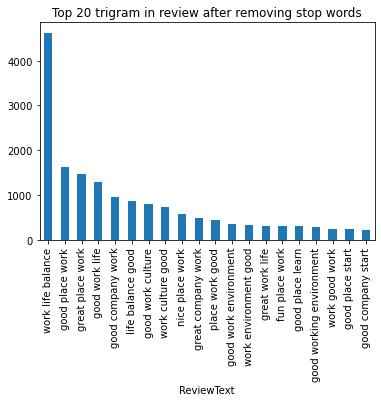

In [157]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(reviews, 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 trigram in review after removing stop words')


In [7]:
processed_docs = []
for i in range(len(reviews)):
    processed_docs.append(tokenize(reviews[i]))
processed_docs[:10]


[['great',
  'company',
  'people',
  'care',
  'make',
  'difference',
  'management',
  'care',
  'employee',
  'well',
  'providing',
  'continued',
  'learning',
  'opportunity'],
 ['powerhouse',
  'epc',
  'went',
  'heavy',
  'worksharing',
  'send',
  'much',
  'work',
  'overseas',
  'possible',
  'keep',
  'core',
  'person',
  'heavy',
  'loaded',
  'company',
  'management',
  'chase',
  'project',
  'hire',
  'thousand',
  'oil',
  'booming',
  'turn',
  'lay',
  'thousand',
  'going',
  'sharpest',
  'spike',
  'hiring',
  'laying',
  'employee',
  'clearly',
  'greatest',
  'asset'],
 ['much',
  'could',
  'add',
  'enjoyed',
  'working',
  'people',
  'working',
  'loved',
  'hour',
  'great',
  'flexibility',
  'needed'],
 ['place',
  'pretty',
  'boring',
  'time',
  'interesting',
  'facility',
  'uranium',
  'enrichment',
  'almost',
  'half',
  'century'],
 ['everyone',
  'hurry',
  'get',
  'thing',
  'done',
  'hurry',
  'part',
  'make',
  'sure',
  'get',
  'nee

In [8]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(processed_docs)
# Create Corpus
texts = processed_docs
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]]


In [76]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           workers = 10,
                                           passes=10,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [79]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus)
corpus_sets = [#gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               #gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()










  0%|                                                                                          | 0/540 [00:00<?, ?it/s]








 19%|██████████████▊                                                                 | 100/540 [03:20<14:41,  2.00s/it]








 37%|█████████████████████████████▋                                                  | 200/540 [06:41<11:21,  2.01s/it]








 56%|████████████████████████████████████████████▍                                   | 300/540 [10:16<08:11,  2.05s/it]








 74%|███████████████████████████████████████████████████████████▎                    | 400/540 [13:36<04:44,  2.03s/it]








 93%|██████████████████████████████████████████████████████████████████████████      | 500/540 [16:58<01:21,  2.03s/it]








600it [20:30,  2.06s/it]                                                                                               








700it [23:56,  2.06s/it]








800it [27:22,  2.06s/it]








900it [30:53,  2.07s/it]






24600it [13:52:50,  2.25s/it]








24700it [13:56:29,  2.23s/it]








24800it [14:00:12,  2.23s/it]








24900it [14:03:48,  2.21s/it]








25000it [14:07:23,  2.19s/it]








25100it [14:11:04,  2.20s/it]








25200it [14:14:30,  2.16s/it]








25300it [14:17:48,  2.10s/it]








25400it [14:21:17,  2.10s/it]








25500it [14:24:43,  2.09s/it]








25600it [14:28:03,  2.06s/it]








25700it [14:31:30,  2.07s/it]








25800it [14:34:51,  2.05s/it]








25900it [14:38:17,  2.05s/it]








26000it [14:41:48,  2.07s/it]








26100it [14:45:23,  2.09s/it]








26200it [14:48:58,  2.11s/it]








26300it [14:52:29,  2.11s/it]








26400it [14:56:02,  2.12s/it]








26500it [14:59:49,  2.16s/it]








26600it [15:03:36,  2.19s/it]








26700it [15:07:23,  2.22s/it]








26800it [15:11:26,  2.28s/it]








26900it [15:15:09,  2.27s/it]








27000it [15:19:14,  2.32s/it]








27100it [15:24:12,  2.52s/it]








27200it [15:

49800it [31:15:05,  2.12s/it]








49900it [31:18:40,  2.13s/it]








50000it [31:22:04,  2.10s/it]








50100it [31:25:44,  2.13s/it]








50200it [31:29:26,  2.16s/it]








50300it [31:33:05,  2.17s/it]








50400it [31:36:44,  2.17s/it]








50500it [31:40:37,  2.22s/it]








50600it [31:44:14,  2.21s/it]








50700it [31:47:50,  2.19s/it]








50800it [31:51:31,  2.20s/it]








50900it [31:55:28,  2.25s/it]








51000it [31:59:11,  2.25s/it]








51100it [32:02:55,  2.24s/it]








51200it [32:06:41,  2.25s/it]








51300it [32:10:35,  2.28s/it]








51400it [32:14:13,  2.25s/it]








51500it [32:17:49,  2.22s/it]








51600it [32:21:45,  2.26s/it]








51700it [32:25:30,  2.26s/it]








51800it [32:29:18,  2.26s/it]








51900it [32:33:00,  2.25s/it]








52000it [32:36:43,  2.25s/it]








52100it [32:40:27,  2.24s/it]








52200it [32:43:58,  2.20s/it]








52300it [32:47:29,  2.17s/it]








52400it [32:

In [96]:
pd.DataFrame(model_results).sort_values(by = ['Coherence','Topics'],ascending=False)

,Validation_Set,Topics,Alpha,Beta,Coherence
359,100% Corpus,4,asymmetric,symmetric,0.607606
449,100% Corpus,7,asymmetric,symmetric,0.599998
355,100% Corpus,4,asymmetric,0.01,0.598535
385,100% Corpus,5,asymmetric,0.01,0.597811
365,100% Corpus,5,0.31,0.01,0.596371
...,...,...,...,...,...
153,75% Corpus,7,0.01,0.91,0.421342
93,75% Corpus,5,0.01,0.91,0.409832
33,75% Corpus,3,0.01,0.91,0.404989
63,75% Corpus,4,0.01,0.91,0.403223


In [9]:
# since 7 and 4 topics have almost same Coherence value I think more topics would be better??
final_lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7, 
                                           random_state=100,
                                           chunksize=100,
                                           workers = 10,
                                           passes=10,
                                           alpha='asymmetric',
                                           eta='symmetric',
                                           per_word_topics=True)

In [10]:
# Select the model and print the topics
optimal_model = final_lda_model
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=20))

[(0,
  '0.086*"work" + 0.072*"good" + 0.023*"place" + 0.020*"working" + '
  '0.020*"great" + 0.020*"company" + 0.019*"environment" + 0.019*"lot" + '
  '0.019*"learn" + 0.018*"management" + 0.015*"culture" + 0.015*"technology" + '
  '0.014*"life" + 0.014*"opportunity" + 0.014*"project" + 0.012*"learning" + '
  '0.011*"nice" + 0.011*"balance" + 0.010*"friendly" + 0.010*"experience"'),
 (1,
  '0.041*"work" + 0.040*"company" + 0.025*"good" + 0.023*"employee" + '
  '0.020*"great" + 0.018*"management" + 0.016*"benefit" + 0.013*"place" + '
  '0.011*"salary" + 0.011*"people" + 0.010*"life" + 0.010*"job" + 0.009*"pay" '
  '+ 0.009*"culture" + 0.008*"opportunity" + 0.007*"balance" + 0.006*"manager" '
  '+ 0.006*"le" + 0.006*"growth" + 0.006*"care"'),
 (2,
  '0.019*"project" + 0.019*"application" + 0.015*"development" + '
  '0.013*"software" + 0.012*"system" + 0.011*"client" + 0.011*"using" + '
  '0.010*"requirement" + 0.009*"testing" + 0.009*"business" + 0.008*"code" + '
  '0.008*"process" + 0.0

In [101]:
lda_display = pyLDAvis.gensim.prepare(optimal_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

#### What is the Dominant topic and its percentage contribution in each review

In [13]:
with open("../data/all_reviews.pkl","rb") as f:
    reviews_ = pickle.load(f)
    
job_filter = pd.read_csv("../data/filter_job_titles.csv")

job_filters = job_filter.clean_job_title.tolist()
idx = (reviews_.language == "en")
reviews_ = reviews_.loc[idx,:]

idx = (reviews_.clean_job_title.isin(job_filters))
reviews_ = reviews_.loc[idx,:].reset_index()

print(reviews_.shape)
#display(reviews_.head())


(45251, 16)


In [12]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=reviews):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=final_lda_model, corpus=corpus, texts=reviews)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()

df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

df_dominant_topic["Review"] = reviews_["review"] 
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Review
0,0,1.0,0.6714,"work, company, good, employee, great, manageme...",great company people care make difference mana...,Fluor is a great company with people that care...
1,1,5.0,0.7672,"job, part, work, time, management, people, get...",powerhouse epc went heavy worksharing send muc...,Fluor was the first powerhouse EPC that went h...
2,2,5.0,0.5122,"job, part, work, time, management, people, get...",much could add enjoyed working people working ...,There is not much that I could add here. I en...
3,3,3.0,0.5624,"year, worked, working, experience, contract, c...",place pretty boring time interesting facility ...,The place can be pretty boring most of the tim...
4,4,5.0,0.7273,"job, part, work, time, management, people, get...",everyone hurry get thing done hurry part make ...,"Everyone is in a hurry to get things done, but..."
5,5,1.0,0.5117,"work, company, good, employee, great, manageme...",hire term would rate hired nice intelligent pe...,Was a re-hire. \rFirst term would rate them a...
6,6,5.0,0.6431,"job, part, work, time, management, people, get...",hated working company pay great management utt...,I hated working for this company. The pay was ...
7,7,0.0,0.4551,"work, good, place, working, great, company, en...",interesting day work enjoyable environment use...,Interesting days at work in a enjoyable enviro...
8,8,1.0,0.4780,"work, company, good, employee, great, manageme...",challenging place work manager five office 200...,Challenging place to work as IT Manager with f...
9,9,3.0,0.7296,"year, worked, working, experience, contract, c...",total thirty seven 37 year successful engineer...,Total of thirty-seven (37) years of successful...


In [22]:
with open("../data/tech_review_with_topics.pkl","wb") as f:
    pickle.dump(df_dominant_topic, f)

In [27]:
df_dominant_topic[40:50]

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Review
40,40,1.0,0.8325,"work, company, good, employee, great, manageme...",company passive aggressive treat employee thre...,This company is very passive aggressive with h...
41,41,5.0,0.5550,"job, part, work, time, management, people, get...",retail base pay determined corporate pay raise...,It's retail. Base pay is determined by corpora...
42,42,2.0,0.4192,"project, application, development, software, s...",home depot home improvement retailer nearly 40...,The Home Depot is the home improvement retaile...
43,43,5.0,0.6600,"job, part, work, time, management, people, get...",time home depot moved different department tim...,In my time at Home Depot I have been moved to ...
44,44,1.0,0.5424,"work, company, good, employee, great, manageme...",team practice agile development pair programmi...,Most teams practice agile development and pair...
45,45,0.0,0.5142,"work, good, place, working, great, company, en...",home depot great company work lot encouragemen...,Home depot is a great company to work for. The...
46,46,0.0,0.4876,"work, good, place, working, great, company, en...",good company work pair programming environment...,good company to work. pair programming environ...
47,47,1.0,0.5293,"work, company, good, employee, great, manageme...",one exptin life great company always date good...,Its one of the best exptin my life. Great team...
48,48,1.0,0.4551,"work, company, good, employee, great, manageme...",good place individual develop skill learn work...,A good place for individuals to develop skills...
49,49,1.0,0.4784,"work, company, good, employee, great, manageme...",company good work life balance okay compensati...,A company with good work/life balance with oka...


In [26]:
df_dominant_topic.Review[36]

'The culture is great, and you get to learn a lot, but you really have to push to get new things adopted and tested. Learning opportunities have to be fought for. Work life balance is great but the benefits are lacking. Compensation is also competitive but promotions and raises are not clearly marked.'

In [30]:
df_dominant_topic.Review[49]

'A company with good work/life balance with okay compensation. \rUnless you work for the e-commerce team, you might be working with a technologically conservative team. Talks a lot about trying to beat amazon, but not willing to take the actual steps get there.\rFor trying to claim to compete with other technology companies, the Home Depot actually has a surprisingly large amount of people who can’t code in the tech department holding the title of software engineer. \rThis could be a problem in some teams where someone who can’t code is leading a project and relies on contractors who are also equally incompetent to do all the coding. \rHowever, there are teams who are working on cutting edge technologies/tools. Make sure you get into the right team or you will be disappointed.'

In [17]:
df_dominant_topic.Review[8]

'Challenging place to work as IT Manager with five offices and over 200 users and me being the sole IT support for the entire IT Infrastructure.  Decent pay and good benefits.  Need to be willing to relocate every couple years as projects are generally 1-5 years and then would need to move wherever the next project is.'

In [142]:
df_dominant_topic.groupby('Dominant_Topic').size()

Dominant_Topic
0.0    21296
1.0    11526
2.0     1848
3.0     1007
4.0      395
5.0     8189
6.0      990
dtype: int64

#### The most representative sentence for each topic

In [124]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9775,"work, good, place, working, great, lot, learn, environment, company, management",really great work biggest brand india learned lot project part tc really give responsibility han...
1,1.0,0.9823,"work, company, good, employee, great, management, benefit, life, place, salary",people great work well immediate management seem truly care taking care team overall work life b...
2,2.0,0.9924,"application, project, development, software, using, system, requirement, client, testing, code",involved complete sdlc software development life cycle plan analyze design build test rollout im...
3,3.0,0.9437,"year, worked, working, experience, company, month, time, contract, position, many",contributed many project worked hard achieve project goal given back member left company contrac...
4,4.0,0.9654,"network, system, computer, software, server, hardware, operation, user, support, security",managing department hardware wing site preparation troubleshooting network problem preventive ma...
5,5.0,0.9854,"job, time, part, work, management, people, get, would, manager, working",unhappy never received helped asked often reprimanded fast enough get anything done yet gotten h...
6,6.0,0.9761,"customer, service, issue, support, problem, system, solution, client, business, call",home retailer home improvement construction product service operates many box format store acros...
